# 신경망 알고리즘을 벡터화해 한 번에 전체 샘플 사용하기


## SingleLayer 클래스에 배치 경사 하강법 적용하기

In [3]:
# 1. 넘파이 맷플롯립 임포트
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# 2. 위스콘신 유방암 데이터 세트를 훈련, 검증 , 테스트 세트로 나누고 데이터 살펴보기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size = 0.2, random_state=42)




In [5]:
# 3. cancer 데이터 세트 특성 개수 30개  
# shape으로 크기 확인

print(x_train.shape, x_val.shape)

(364, 30) (91, 30)


In [6]:
# 4. 정방향 계싼을 행렬 곱셈으로 표현
# 스칼라(scalar)는 하나의 실숫값을 의미한다. 여러 개가 모이면 벡터가 만들어진다.


In [7]:
# 5. 그레이디언트 계산 이해

In [8]:
# 6. forpass(), backprop() 메서드에 배치 경사 하강법 적용하기

def forpass(self, x):
    z = np.dot(x, self.w) + self.b # 선형 출력 계산
    return z

def backprop(slef, x, err):
    m = len(x)
    w_grad = np.dot(x.T, err) / m # 가중치에 대한 평균 그레이디언트를 계산한다.
    b_grad = np.sum(err) / m # 절편에 대한 평균 그레이디언트를 계산한다.
    
    return w_grad, b_grad

# 파이썬의 len() 함수는 넘파이 배열의 행 크기를 반환하므로 이 값을 이용해 그레이디언트의 평균을 계산한다.
# 절편의 그레이디언트는 오차이므로 오차 행렬의 평균값을 구한다.



In [9]:
# 7. fit() 메서드 수정하기
# 배치 경사 하강법에서는 forpass() 메서드와 backprop() 메서드에서 전체 샘플을 한꺼번에 계산하므로 두 번째 for문이 삭제된다.

def fit(self, x, y, eprochs=100, x_val=None, y_val=None):
    y = y.reshape(-1,1) # 타깃을 열 벡터로 바꾼다.
    y_val = y_val.reshape(-1, 1)  #검증용 타깃을 열 벡터로 바꾼다.
    m = len(x) # 샘플 개수 저장
    self.w = np.ones((x.shape[1], 1)) # 가중치 초기화
    self.b = 0
    self.w_history.append(self.w.copy()) # 가중치를 기록한다.
    
    for i in range(epochs):
        z = self.forpass(x) # 정방향 계산을 수행한다.
        a = slef. activation(z) # 활성화 함수를 적용한다.
        err = -(y -a) # 오차 계산
        w_grad, b_grad = self.backprop(x, err) # 오차를 역전파해 그레이디언트를 계산한다.
        w_grad += (self.l1 * np.sign(self.w) + self.l2* self.w) / m # 그레이디언트에서 패널티 항의 미분값 더하기
        self.w -= self.lr * w_grad # 가중치 절편 업데이트
        self.b -= self.lr * b_grad
        
        self.w_history.append(self.w.copy()) # 가중치 기록하기
        a = np.clip(a, 1e-10, 1-1e-10) # 안전한 로그 계산을 위해 클리핑하기
        loss = np.sum(-(y*np.log(a) + (1-y) * np.log(1-a))) # 로그 손실 규제 손실 더해 리스트에 추가
        self.losses.append((loss + self.reg_loss())/m)
        self.update_val_loss(x_val, y_val) # 검증 세트에 대한 손실 계산
        
        
# 전체 구조는 확률적 경사 하강법과 비슷하지만 for문이 한 단계 삭제되어 코드가 훨씬 간단해짐
# 활성화 출력 a가 열 벡터이므로 이에 맞추어 타깃값을(m,1)크기의 열 벡터로 변환하고 평균 손실 구하기 위해 np.sum()함수로 각 샘플의 손실을 더한 후 전체 샘플의 개수로 나눈다.



        

In [10]:
# 8. 나머지 메서드 수정
#predict() 메서드에서 사용했던 리스트 내포와 update_val, loss() 메서드 간단하게 변환

def predict(self, x):
    z = self.forpass(x) # 정방향 계산을 수행한다.
    return z >0  # 스텝 함수 적용

def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val) # 정방향 계산 수행
    a = self.activation(z) # 활성화 함수 적용
    a = np.clip(a, 1e-10, 1-1e-10)  #출력값 클리핑
    
    # 로그 손실과 규제 손실 더해 리스트에 추가
    val_loss = np.sum(-(y_val*np.log(a) + (1-y_val) * np.log(1-a)))
    self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

In [11]:
#  SingleLayer 클래스 전체 코드

class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None              # 가중치
        self.b = None              # 절편
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.w_history = []        # 가중치 기록
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z = np.dot(x, self.w) + self.b        # 선형 출력을 계산합니다.
        return z

    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T, err) / m         # 가중치에 대한 그래디언트를 계산합니다.
        b_grad = np.sum(err) / m              # 절편에 대한 그래디언트를 계산합니다.
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)                  # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                            # 샘플 개수를 저장합니다.
        self.w = np.ones((x.shape[1], 1))     # 가중치를 초기화합니다.
        self.b = 0                            # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())  # 가중치를 기록합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            z = self.forpass(x)               # 정방향 계산을 수행합니다.
            a = self.activation(z)            # 활성화 함수를 적용합니다.
            err = -(y - a)                    # 오차를 계산합니다.
            # 오차를 역전파하여 그래디언트를 계산합니다.
            w_grad, b_grad = self.backprop(x, err)
            # 그래디언트에서 페널티 항의 미분 값을 더합니다.
            w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
            # 가중치와 절편을 업데이트합니다.
            self.w -= self.lr * w_grad
            self.b -= self.lr * b_grad
            # 가중치를 기록합니다.
            self.w_history.append(self.w.copy())
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
    
    def predict(self, x):
        z = self.forpass(x)      # 정방향 계산을 수행합니다.
        return z > 0             # 스텝 함수를 적용합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))
    
    def reg_loss(self):
        # 가중치에 규제를 적용합니다.
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.activation(z)             # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
        val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))
        

In [12]:
# 9. 훈련 데이터 표준화 전처리
# 데이터 전처리 관련 클래스들을 sklearn.preprocessing 모듈 아래에 존재한다. 
# 이런 클래스들을 변환기(transformer) 라고 부른다.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

# fir() 메서드를 통해 변환 규칙 익히기
# transform() 메서드로 데이터를 표준화 전처리를 하고 
# 훈련 세트와 검증 세트에 표준화 적용해 x_train_scaled, x_val_scaled준비

In [13]:
# 10. SingleLayer 클래스 객체에 전달해 배치 경사 하강법 적용

single_layer = SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val,
                 epochs=10000)

single_layer.score(x_val_scaled, y_val)

# 에포크를 늘린 이뉴는 확률적 경사 하강법과 배치 경사 하강법은 에포크마다 
# 가중치 업데이트를 하는 횟수에 차이가 있기 때문이다.
# 훈련 세트 샘플이 364개 일 경우 확률적 경사 하강법은 100번의 에포크를 수행하면 36,400번의 가중치 업데이트가 일어난다.
# 반면 배치 경사 하강법은 전체 훈련 세트를 한 번에 계산한 다음 오차를 역전파 하기 때문에 100번의 에포크를 수행하면 가중치는 100번만 업데이트 된다.
# 따라서 확률적 경사 하강법은 에포크횟수를 크게 늘려주어야 한다.


0.978021978021978

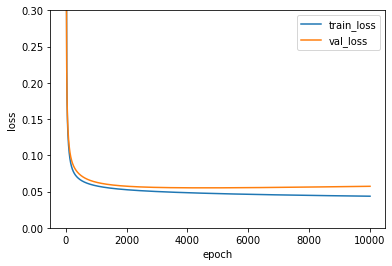

In [14]:
# 11. 검증 세트로 성능 측정하고 그래프로 비교

# 훈련 손실과 검증 손실 그래프로 출력해 확률적 경사 하강법과 비교

plt.ylim(0, 0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

# 배치 경사 하강법은 전체 샘플을 사용해 가중치를 업데이트하기 때문에 손실값이 안정적으로 감소한다.


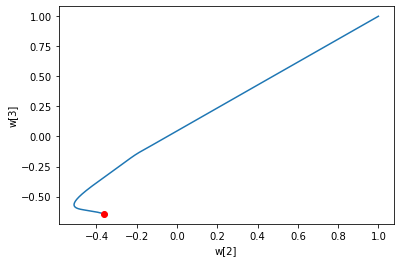

In [15]:

w2 = []
w3 = []
for w in single_layer.w_history:
    w2.append(w[2])
    w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')

plt.show()

## 6_2 2개의 층을 가진 신경망 구현


In [39]:
# 1. SingleLayer 클래스를 상속한 DualLayer 클래스 만들기

class DualLayer(SingleLayer):
    def __init__(self, units=10, learning_rate=0.01, l1=0, l2=0):
        self.units = units # 은닉층 뉴런 개수
        self.w1 = None # 은닉층의 가중치
        self.b1 = None # 은닉층의 절편
        self.w2 = None # 출력층의 가중치
        self.b2 = None # 출력층의 절편
        self.a1 = None # 은닉층의 활성화 출력
        self.losses = [] # 훈련 손실
        self.val_losses = [] # 검증 손실
        self.lr = learning_rate # 학습률
        self.l1 = l1 # L1 손실 하이퍼파라미터
        self.l2 = l2 # L2 손실 하이퍼파라미터
        
# SingleLayer 클래스는 학습 과정을 이해하기 쉽도록 w_history변수에 가중치 변화를 기록했지만
# DualLayer 클래스에서는 가중치 변화를 기록하지 않는다.

In [40]:
# 2. forpass() 메서드 수정
# forpass() 메서드에서는 은닉층과 출력층의 정방향 계산 수행

def forpass(self, w):
    z1 = np.dot(x, self.w1) + self.b1 # 첫 번째 층의 선형식을 계산
    self.a1 = self.activation(z1) # 활성화 함수 적용
    z2 = np.dot(self.a1, self.w2) + self.b2 # 두 번째 층의 선형식 계산
    return z2


In [41]:
# 3. backprop() 메서드 수정
# 그레이디언트를 계산하는 backprop 
# 모델 훈련에서 오차를 역전파하는 역할을 하므로 주의해서 구현

def backprop(self, x, err):
    m = len(x) # 샘플 개수
    # 출력층의 가중치와 절편에 대한 그레이디언트를 계산한다.
    w2_grad = np.dot(self.a1.T, err) / m
    b2_grad = np.sum(err) / m
    # 시그모이드 함수까지 그레이디언트를 계산한다.
    err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1-self.a1)
    # 은닉층의 가중치와 절편에 대한 그레이디언트를 계산
    w1_grad = np.dot(x.T, err_to_hidden) / m
    b1_grad = np.sum(err_to_hidden, axis=0) /m
    return w1_grad, b1_grad, w2_grad, b2_grad

    

In [42]:
# 4~5. fit() 메서드 수정
# 모델 훈련 담당 
# 은닉층과 출력층의 가중치, 절편 초기화 에포크마다 정방향 계산 수행해 오차 계산
# 오차를 역전파해 가중치와 절편의 그레이디언트를 계산
# 손실 계산 누적
# 3개의 작은 메서드로 쪼갬


def init_weights(self, n_features):
    self.w1 = np.ones((n_features, self.units)) # (특성 개수, 은닉층의 크기)
    self.b1 = np.zeros(self.units) # 은닉층의 크기
    self.w2 = np.ones((self.units, 1))# 은닉층의 크기, 1
    self.b2 = 0
    


In [43]:
# 6. fit() 메서드의 for문 안에 있는 코드 일부 traning() 메서드로 분리

def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y = y.reshape(-1, 1) # 타깃을 열 벡터로 변경
    y_val = y_val.reshape(-1, 1)
    m = len(x) # 샘플의 개수 저장
    self.init_weights(x.shape[1])  # 은닉층과 출력층의 가중치 초기화
    # epochs 만큼 반복
    for i in range(epochs):
        a = self.training(x, y, m)
        # 안전한 계산 위해 클리핑
        a = np.clip(a, 1e-10, 1-1e-10)
        
        # 로그 손실과 규제 손실 더해 리스트에 추가
        loss =  np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
        self.losses.append((loss + self.reg_loss())/m)
        # 검증 세트에 대한 손실 계산
        self.update_val_loss(x_val, y_val)
        
        
def training(self, x, y, m):
    z = self.forpass(x)  # 정방향 계산 수행
    a = self.activation(z) # 활성화 함수 적용
    err = -(y-a) # 오차 계산
    # 오차 역전파하여 그레이디언트 계산
    w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
    # 그레이디언트에서 페널티 항의 미분값 빼기
    w1_grad += (self.l1 * np.sign(self.w1) + self.l2 *self.w1) /m
    w2_grad += (self.l1 * np.sign(self.w2) + self.l2 *self.w2) /m
    # 은닉층의 가중치와 절편 업데이트
    self.w1 -= self.lr * w1_grad
    self.b1 -= self.lr * b1_grad
    
    # 출력층의 가중치와 절편 업데이트
    self.w2 -= self.lr * w2_grad
    self.b2 -= self.lr * b2_grad
    return a

# 정방향 계산과 그레이디언트를 업데이트하는 코드를 training() 메서드로 옮겼다.
# 이 메서드는 훈련 데이터 x,y와 훈련 샘플의 개수 m을 매개변수로 받고 마지막 출력층의 활성화 출력 a를 반환한다.

In [44]:
# 7. reg_loss() 메서드 수정하기
# reg_loss() 메서드는 은닉층과 출력층의 가중치에 대한 L1,L2 손실을 계산한다.

def reg_loss(self):
    # 은닉층과 출력층의 가중치에 규제를 적용
    return self.l1 * (np.sum(np.abs(self.w1) + np.sum(np.abs(self.w2)))) + \
                self.l2 / 2 * (np.sim(self.w1**2) + np.sum(self.w2**2))




## 모델 훈련하기

In [45]:
class DualLayer(SingleLayer):
    
    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.activation(z1)            # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)               # 은닉층의 크기
        self.w2 = np.ones((self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)          # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                    # 샘플 개수를 저장합니다.
        self.init_weights(x.shape[1]) # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            a = self.training(x, y, m)
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
            
    def training(self, x, y, m):
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.activation(z)    # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에서 페널티 항의 미분 값을 뺍니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
    
    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

In [46]:
#1. 다층 신경망 모델 훈련하고 평가

# L2 규제는 0.01만큼, 에포크는 20,000번 지정

dual_layer = DualLayer(l2 = 0.01)
dual_layer.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val=y_val, epochs=20000)
dual_layer.score(x_val_scaled, y_val)

0.978021978021978

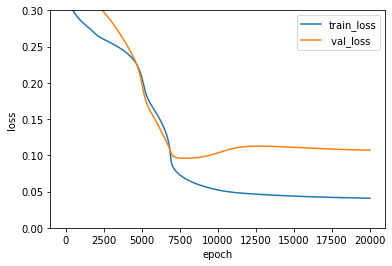

In [47]:

# 2. 훈련 손실과 검증 손실 그래프 분석

plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', ' val_loss'])
plt.show()

# 손실 그래프가 이전보다 천천히 감소하는 이유는 SingleLayer보다 
# 가중치의 개수가 훨씬 많아져 학습하는데 시간이 오래 걸리기 때문
# 위스콘신 유방암 데이터의 특성이 30개이므로 SingleLayer 클래스를 사용했을 때는 가중치 30개와 절편 1개가 필요하다.

# 은닉층 뉴런이 10개였으므로 30 * 10개의 가중치와 10개의 절편이 필요하고 
# 출력층 역시 10개의 가중치와 1개의 절편이 필요하다. 
# DualLayer 모델은 총 321개의 가중치를 학습해야 한다.

## 가중치 초기화 개선



In [48]:
# 1. 가중치 초기화를 위한 init__weights() 메서드 수정하기
# RandomInitNetwork 클래스 만들고 가중치 초기화하는 init__weights() 메서드만 고치기



class RandomInitNetwork(DualLayer):
    
    def init_weights(self, n_features):
        np.random.seed(42)
        self.w1 = np.random.normal(0, 1, (n_features, self.units))  #특성 개수, 은닉층의 크기
        self.b1 = np.zeros(self.units) # 은닉층의 크기
        self.w2 = np.random.normal(0, 1, (self.units, 1)) # (은닉층의 크기, 1)
        self.b2 = 0
        

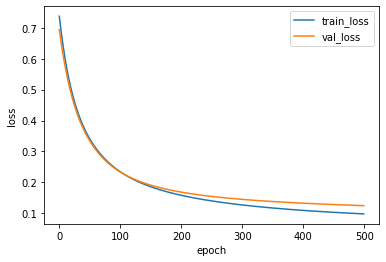

In [49]:
# 2. 객체 생성 후 모델 훈련 시키기
random_init_net = RandomInitNetwork(l2 =0.01)
random_init_net.fit(x_train_scaled, y_train, x_val=x_val_scaled, 
                    y_val=y_val, epochs=500)


plt.plot(random_init_net.losses)
plt.plot(random_init_net.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()
# 손실 함수가 감소하는 곡선이 매끄럽다,.